In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
from keras.datasets import mnist

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error, binarize_images, rotate

## Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Load model

In [3]:
model_location = os.path.join('..', 'saved_models', 'rotation_finder.h5')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

## Evaluate model

In [4]:
batch_size = 128
out = model.evaluate_generator(
    RotNetDataGenerator(
        X_test,
        batch_size=batch_size,
        preprocess_func=binarize_images,
        shuffle=True
    ), 
    steps=len(y_test) / batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

C:\Users\Amir\AppData\Local\Temp\ipykernel_15124\3491434466.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  out = model.evaluate_generator(


Test loss: 1.9194859266281128
Test angle error: 2.5486550331115723


## Display examples

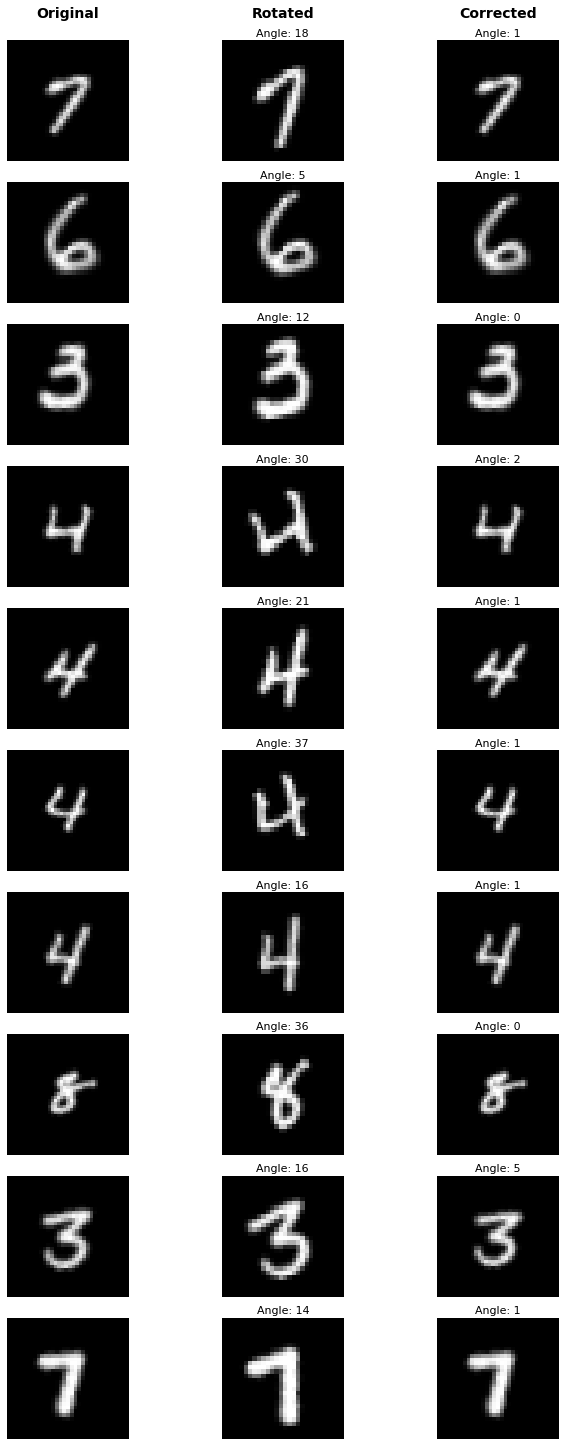

In [5]:
num_images = 10
import numpy as np

display_examples(
    model, 
    X_test,
    num_images=num_images,
    preprocess_func=binarize_images,
)

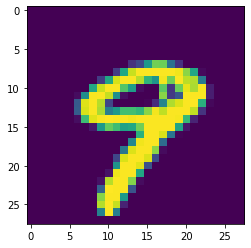

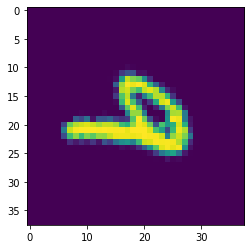

In [7]:
input_image = X_test[9]
plt.imshow(input_image)
plt.show()
r = rotate(input_image, -60)
plt.imshow(r)
plt.show()


In [8]:
images = np.expand_dims(input_image,0)
N, h, w = images.shape[:3]
size = (h, w)

In [9]:
model.predict(np.expand_dims(input_image,0))

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [10]:
y_pred = np.argmax(model.predict(np.expand_dims(input_image,0)), axis=1)
y_pred

array([2], dtype=int64)

(28, 28)


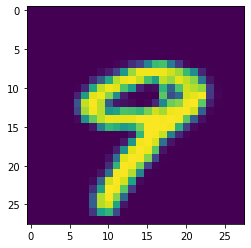

In [11]:
corrected_image = rotate(input_image, -y_pred)
print(corrected_image.shape)
plt.imshow(np.squeeze(corrected_image).astype("uint8"))